# Задача бинарной классификации

In [8]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

## Обработка данных

In [16]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"spam", "v2":"text"})
df['spam'] = list(map(lambda spam: 1 if spam == 'spam' else 0, df['spam']))
df.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADC502DEB8>]],
      dtype=object)

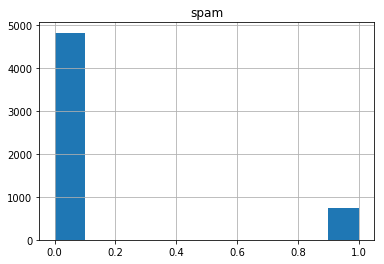

In [17]:
df.hist(column='spam')
# Несбалансированные выборки, поэтому используем roc-auc.

## Формирование признаков
Токенизация. Выделяем слова из текста для формирования признаков

In [19]:
df['free'] = list(map(lambda text: 'free' in text.lower(), df['text']))
features = ['free']
df.head()

,spam,text,free
0,0,"Go until jurong point, crazy.. Available only ...",False
1,0,Ok lar... Joking wif u oni...,False
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,0,U dun say so early hor... U c already then say...,False
4,0,"Nah I don't think he goes to usf, he lives aro...",False


In [20]:
features_train, features_test, labels_train, labels_test = train_test_split(
    df[features], df['spam'], test_size=0.3, random_state=42)

## Построение моделей

### Логистическая регрессия

In [21]:
model = LogisticRegression()
model.fit(features_train, labels_train)
prediction_train = model.predict(features_train)
prediction_test = model.predict(features_test)
print(f'roc_auc on train: {roc_auc_score(labels_train, prediction_train)}')
print(f'roc_auc on test: {roc_auc_score(labels_test, prediction_test)}')

roc_auc on train: 0.6312884179877062
roc_auc on test: 0.6144663693759094
